# load the data

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics, model_selection

In [2]:
file_name = 'google_review_ratings.csv'
data = pd.read_csv('google_review_ratings.csv',index_col='User')

In [3]:
data

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,...,0.60,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN
User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,...,0.60,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.00,NaN


# prepare the data

## 判斷缺失值

In [4]:
data['Category 11']

User
User 1        1.7
User 2        1.7
User 3        1.7
User 4       1.73
User 5        1.7
User 6       1.71
User 7       1.73
User 8        1.7
User 9       1.71
User 10      1.69
User 11      1.67
User 12      1.67
User 13      1.67
User 14      1.65
User 15      1.65
User 16      1.65
User 17      1.65
User 18      1.65
User 19      1.65
User 20      1.65
User 21      1.65
User 22      1.65
User 23      1.65
User 24      1.65
User 25      1.66
User 26      1.66
User 27      1.66
User 28      1.66
User 29      1.66
User 30      1.66
             ... 
User 5427    1.35
User 5428    1.35
User 5429    1.35
User 5430    1.35
User 5431    1.35
User 5432    1.34
User 5433    1.34
User 5434    1.32
User 5435    1.31
User 5436     1.3
User 5437    1.28
User 5438    1.27
User 5439    1.25
User 5440    1.23
User 5441    1.22
User 5442     1.2
User 5443    1.18
User 5444    1.17
User 5445    1.15
User 5446    1.13
User 5447    1.12
User 5448     1.1
User 5449    1.08
User 5450    1.06
User 

In [5]:
data['Category 11']=pd.to_numeric(data['Category 11'], errors='coerce')

In [6]:
data.isnull().sum()

Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       1
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [7]:
data = data.drop(columns='Unnamed: 25')
data

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,...,1.75,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,...,1.74,0.60,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,...,0.75,0.60,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.00


In [8]:
data=data.fillna(0)
data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

## 統計描述

In [9]:
pd.set_option('display.max_columns', None)
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.549604,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.382074,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.000000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
mean1=np.mean(data,0)
mean1

Category 1     1.455720
Category 2     2.319707
Category 3     2.489331
Category 4     2.796886
Category 5     2.958941
Category 6     2.893490
Category 7     3.351395
Category 8     2.540795
Category 9     3.126019
Category 10    2.832729
Category 11    2.549604
Category 12    2.077958
Category 13    2.125511
Category 14    2.190861
Category 15    2.206573
Category 16    1.192801
Category 17    0.949203
Category 18    0.822414
Category 19    0.969811
Category 20    1.000071
Category 21    0.965838
Category 22    1.750537
Category 23    1.531453
Category 24    1.560469
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

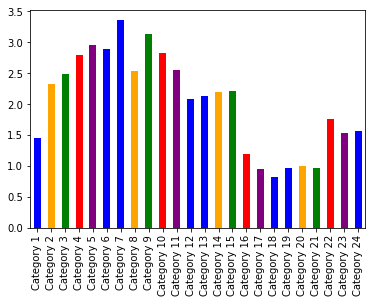

In [11]:
colors = ["blue", "orange", "green", "red", "purple"]
mean1.plot.bar(color=colors)
plt.show


可以看出Category 18的mean=0.822為所有種類中最低，Category 7的mean=3.351為最高

In [12]:
data['user_mean']=np.mean(data,1)
print('user_mean max=',data['user_mean'].max())
print('user_mean min=',data['user_mean'].min())

user_mean max= 2.8625000000000003
user_mean min= 1.235


# Define a reasonable problem:哪些User將可能再次遊覽歐洲?

## Classification

In [13]:
df=data.copy()

對於每個種類，rating<=1的user為不再考慮觀光該種類景點的人；反之，rating>1的user為可能再度觀光該類景點

In [14]:
def mapping(x):
    if x > 1: return 1
    if x <=1: return 0

In [15]:
df['Category 1']=data['Category 1'].apply(mapping)
df['Category 2']=data['Category 2'].apply(mapping)
df['Category 3']=data['Category 3'].apply(mapping)
df['Category 4']=data['Category 4'].apply(mapping)
df['Category 5']=data['Category 5'].apply(mapping)
df['Category 6']=data['Category 6'].apply(mapping)
df['Category 7']=data['Category 7'].apply(mapping)
df['Category 8']=data['Category 8'].apply(mapping)

In [16]:
df['Category 9']=data['Category 9'].apply(mapping)
df['Category 10']=data['Category 10'].apply(mapping)
df['Category 11']=data['Category 11'].apply(mapping)
df['Category 12']=data['Category 12'].apply(mapping)
df['Category 13']=data['Category 13'].apply(mapping)
df['Category 14']=data['Category 14'].apply(mapping)
df['Category 15']=data['Category 15'].apply(mapping)
df['Category 16']=data['Category 16'].apply(mapping)

In [17]:
df['Category 17']=data['Category 17'].apply(mapping)
df['Category 18']=data['Category 18'].apply(mapping)
df['Category 19']=data['Category 19'].apply(mapping)
df['Category 20']=data['Category 20'].apply(mapping)
df['Category 21']=data['Category 21'].apply(mapping)
df['Category 22']=data['Category 22'].apply(mapping)
df['Category 23']=data['Category 23'].apply(mapping)
df['Category 24']=data['Category 24'].apply(mapping)

In [18]:
df=df.drop(columns=['user_mean'])

In [19]:
df['label']=df.sum(axis=1)

In [20]:
print('user_label max=',df['label'].max())
print('user_label min=',df['label'].min())

user_label max= 24
user_label min= 10


如果在24種景點中，有2/3種的景點為可能再次觀光的景點，則我們認定user會再次遊覽歐洲

In [21]:
def travel_again(x):
    if x>=16:
        return 1
    if x<16:
        return 0

In [22]:
data['again']=df['label'].apply(travel_again)
data

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,user_mean,again
User,,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.569167,0
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.581667,0
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.580417,0
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.590417,0
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.580417,0
User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.580417,0
User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,1.73,1.68,1.69,1.71,1.75,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.695000,0
User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,1.70,1.68,1.69,1.71,1.74,0.60,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.787500,0
User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,1.71,1.67,1.68,1.70,0.75,0.60,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.00,1.642083,0


In [23]:
data=data.drop(columns=['user_mean'])

## Logistic Regression

In [24]:
train=data[:3000]
test=data[3000:]

In [25]:
x_train = train.loc[:,train.columns !='again']
y_train = train['again']
x_test = test.loc[:,test.columns !='again']
y_test = test['again']

### evaluation

In [26]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

### fit the data

In [27]:
def fit_evaluation(model,data):
    model.fit(x_train,y_train)
    evaluate(model, x_train, y_train, x_test, y_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression().fit(x_train, y_train)
fit_evaluation(clf, train)

Train accuracy: 0.73
Test accuracy: 0.7039902280130294


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### predict

In [30]:
clf.predict(x_test)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

## improve

利用Ridge Regression分析係數

In [31]:
def scorer(model, x, y):
    preds = model.predict(x)
    return metrics.mean_squared_error(y, preds)

In [32]:
alphas = np.linspace(start=0, stop=0.5, num=11)
alphas

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [33]:
mses = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, x_train, y_train, cv=10, scoring=scorer) #cv=10:分十份
    mses.append(mse.mean()) #mse:list

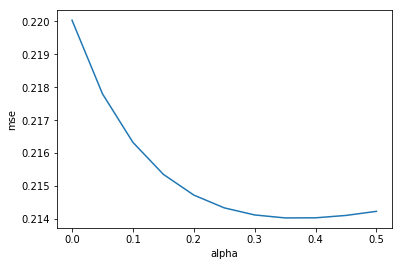

In [34]:
plt.plot(alphas, mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [35]:
best_alpha = alphas[np.argmin(mses)]
best_alpha

0.35000000000000003

In [36]:
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(x_train, y_train)
train_preds = ridge.predict(x_train)
test_preds = ridge.predict(x_test)
train_mse = metrics.mean_squared_error(y_train, train_preds)
test_mse = metrics.mean_squared_error(y_test, test_preds)
print('Train MSE: %s' % train_mse)
print('Test MSE: %s' % test_mse)

Train MSE: 0.19120096322707036
Test MSE: 0.1923181103932386


In [37]:
for i in range(0, len(x_train.columns)):
    print('Coefficient for %s:%s\t%s' %
          (x_train.columns[i], 
           '\t' if len(x_train.columns[i]) < 8 else '',
           ridge.coef_[i]))

Coefficient for Category 1:	0.10207538793768949
Coefficient for Category 2:	-0.0020602375720913217
Coefficient for Category 3:	-0.012124086703839696
Coefficient for Category 4:	0.0256890627227801
Coefficient for Category 5:	0.025058989217973265
Coefficient for Category 6:	0.0007956312674039331
Coefficient for Category 7:	-0.021141689696434197
Coefficient for Category 8:	0.01592455147742646
Coefficient for Category 9:	0.009519483711985108
Coefficient for Category 10:	0.044320472926834165
Coefficient for Category 11:	0.011608887875881322
Coefficient for Category 12:	-0.007010338431126987
Coefficient for Category 13:	0.006046874810739849
Coefficient for Category 14:	-0.0013618998694982483
Coefficient for Category 15:	0.019405858373604278
Coefficient for Category 16:	0.05725780963229885
Coefficient for Category 17:	0.029937942836959976
Coefficient for Category 18:	0.0017367739689673862
Coefficient for Category 19:	0.016661958464093813
Coefficient for Category 20:	0.010177319049095851
Coeff

## drop 

In [38]:
x_train = x_train.drop(['Category 1'], axis=1)
x_test = x_test.drop(['Category 1'], axis=1)

In [39]:
clf = LogisticRegression().fit(x_train, y_train)
fit_evaluation(clf, train)

Train accuracy: 0.7
Test accuracy: 0.6836319218241043


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
